In [1]:
%reload_ext autoreload
%autoreload 2

In [1]:
from result_saver import SaverProvider

provider = SaverProvider()

In [2]:
from Scratch import load_calibration_memory

DEVICE = 'ibm_sherbrooke'
DATE = '2024-03-20'
DOUBLE_MSMT = True

all_memories = load_calibration_memory(provider, tobecalib_backend=DEVICE, other_date=DATE, double_msmt=DOUBLE_MSMT)

Found jobs for backend ibm_sherbrooke with closest execution date 2024-03-23 09:05:45.817173+00:00.


In [3]:
from Scratch import soft_postselect_calib_data

PS_mmr = soft_postselect_calib_data(all_memories, threshold=50e-2)

In [4]:
import numpy as np

for idx, data in PS_mmr.items():
    for key, value in data.items():
        if isinstance(value, np.ndarray):
            print(f'{idx} {key} {value.shape}')


0 mmr_0 (15748,)
0 mmr_1 (15748,)
0 mmr_0_scnd (15748,)
0 mmr_1_scnd (15748,)
1 mmr_0 (15748,)
1 mmr_1 (15748,)
1 mmr_0_scnd (15748,)
1 mmr_1_scnd (15748,)
2 mmr_0 (15748,)
2 mmr_1 (15748,)
2 mmr_0_scnd (15748,)
2 mmr_1_scnd (15748,)
3 mmr_0 (15748,)
3 mmr_1 (15748,)
3 mmr_0_scnd (15748,)
3 mmr_1_scnd (15748,)
4 mmr_0 (15748,)
4 mmr_1 (15748,)
4 mmr_0_scnd (15748,)
4 mmr_1_scnd (15748,)
5 mmr_0 (15748,)
5 mmr_1 (15748,)
5 mmr_0_scnd (15748,)
5 mmr_1_scnd (15748,)
6 mmr_0 (15748,)
6 mmr_1 (15748,)
6 mmr_0_scnd (15748,)
6 mmr_1_scnd (15748,)
7 mmr_0 (15748,)
7 mmr_1 (15748,)
7 mmr_0_scnd (15748,)
7 mmr_1_scnd (15748,)
8 mmr_0 (15748,)
8 mmr_1 (15748,)
8 mmr_0_scnd (15748,)
8 mmr_1_scnd (15748,)
9 mmr_0 (15748,)
9 mmr_1 (15748,)
9 mmr_0_scnd (15748,)
9 mmr_1_scnd (15748,)
10 mmr_0 (15748,)
10 mmr_1 (15748,)
10 mmr_0_scnd (15748,)
10 mmr_1_scnd (15748,)
11 mmr_0 (15748,)
11 mmr_1 (15748,)
11 mmr_0_scnd (15748,)
11 mmr_1_scnd (15748,)
12 mmr_0 (15748,)
12 mmr_1 (15748,)
12 mmr_0_scnd (15748

In [5]:
from Scratch import filter_calib_data

fil_mmr = filter_calib_data(PS_mmr, '01')

In [6]:
for idx, data in fil_mmr.items():
    for key, value in data.items():
        if isinstance(value, np.ndarray):
            print(f'{idx} {key} {value.shape}')

0 mmr_0 (0,)
0 mmr_0_scnd (0,)
0 mmr_1 (2,)
0 mmr_1_scnd (2,)
1 mmr_0 (66,)
1 mmr_0_scnd (66,)
1 mmr_1 (70,)
1 mmr_1_scnd (70,)
2 mmr_0 (196,)
2 mmr_0_scnd (196,)
2 mmr_1 (159,)
2 mmr_1_scnd (159,)
3 mmr_0 (23,)
3 mmr_0_scnd (23,)
3 mmr_1 (11,)
3 mmr_1_scnd (11,)
4 mmr_0 (41,)
4 mmr_0_scnd (41,)
4 mmr_1 (37,)
4 mmr_1_scnd (37,)
5 mmr_0 (574,)
5 mmr_0_scnd (574,)
5 mmr_1 (472,)
5 mmr_1_scnd (472,)
6 mmr_0 (337,)
6 mmr_0_scnd (337,)
6 mmr_1 (336,)
6 mmr_1_scnd (336,)
7 mmr_0 (28,)
7 mmr_0_scnd (28,)
7 mmr_1 (22,)
7 mmr_1_scnd (22,)
8 mmr_0 (512,)
8 mmr_0_scnd (512,)
8 mmr_1 (469,)
8 mmr_1_scnd (469,)
9 mmr_0 (289,)
9 mmr_0_scnd (289,)
9 mmr_1 (249,)
9 mmr_1_scnd (249,)
10 mmr_0 (38,)
10 mmr_0_scnd (38,)
10 mmr_1 (73,)
10 mmr_1_scnd (73,)
11 mmr_0 (26,)
11 mmr_0_scnd (26,)
11 mmr_1 (35,)
11 mmr_1_scnd (35,)
12 mmr_0 (159,)
12 mmr_0_scnd (159,)
12 mmr_1 (120,)
12 mmr_1_scnd (120,)
13 mmr_0 (439,)
13 mmr_0_scnd (439,)
13 mmr_1 (426,)
13 mmr_1_scnd (426,)
14 mmr_0 (33,)
14 mmr_0_scnd (33,)
1

In [7]:
from Scratch import calculate_filtered_ratios

ratios = calculate_filtered_ratios(PS_mmr)
print(ratios)

mean_ratios = {
    'ratio_0_00': 0,
    'ratio_0_01': 0,
    'ratio_0_10': 0,
    'ratio_0_11': 0,
    'ratio_1_00': 0,
    'ratio_1_01': 0,
    'ratio_1_10': 0,
    'ratio_1_11': 0,
}

for idx, data in ratios.items():
    for key, value in data.items():
        mean_ratios[key] += value
mean_ratios = {key: value/len(ratios) for key, value in mean_ratios.items()}
mean_ratios

{0: {'ratio_0_00': 0.9977774955549911, 'ratio_1_00': 0.007429514859029718, 'ratio_0_01': 0.00031750063500127, 'ratio_1_01': 0.000127000254000508, 'ratio_0_10': 0.0, 'ratio_1_10': 0.010223520447040894, 'ratio_0_11': 0.00190500381000762, 'ratio_1_11': 0.9822199644399289}, 1: {'ratio_0_00': 0.9871729743459486, 'ratio_1_00': 0.02178054356108712, 'ratio_0_01': 0.0060325120650241305, 'ratio_1_01': 0.00444500889001778, 'ratio_0_10': 0.004191008382016764, 'ratio_1_10': 0.04635509271018542, 'ratio_0_11': 0.002603505207010414, 'ratio_1_11': 0.9274193548387096}, 2: {'ratio_0_00': 0.9625349250698502, 'ratio_1_00': 0.017843535687071373, 'ratio_0_01': 0.014224028448056897, 'ratio_1_01': 0.010096520193040387, 'ratio_0_10': 0.012446024892049785, 'ratio_1_10': 0.03067056134112268, 'ratio_0_11': 0.01079502159004318, 'ratio_1_11': 0.9413893827787656}, 3: {'ratio_0_00': 0.9786639573279147, 'ratio_1_00': 0.007493014986029972, 'ratio_0_01': 0.005524511049022098, 'ratio_1_01': 0.0006985013970027941, 'ratio_0

{'ratio_0_00': 0.962928925857852,
 'ratio_0_01': 0.009153518307036616,
 'ratio_0_10': 0.008401516803033606,
 'ratio_0_11': 0.019516039032078065,
 'ratio_1_00': 0.023936547873095734,
 'ratio_1_01': 0.007609515219030443,
 'ratio_1_10': 0.024269548539097074,
 'ratio_1_11': 0.9441843883687773}

In [8]:
ratios[20]

{'ratio_0_00': 0.5417195834391669,
 'ratio_1_00': 0.42602235204470407,
 'ratio_0_01': 0.009715519431038861,
 'ratio_1_01': 0.011239522479044958,
 'ratio_0_10': 0.022479044958089917,
 'ratio_1_10': 0.026416052832105665,
 'ratio_0_11': 0.42608585217170436,
 'ratio_1_11': 0.5363220726441453}

In [9]:
from Scratch import postselect_exclude_double_wrong

THRESHOLD = 50e-2

PS_mmr = soft_postselect_calib_data(all_memories, threshold=THRESHOLD)
PS_d_mmr = postselect_exclude_double_wrong(PS_mmr)

In [10]:
qubit = 20

print(all_memories[qubit]['mmr_0'].shape)
print(PS_mmr[qubit]['mmr_0'].shape)
print(PS_d_mmr[qubit]['mmr_0'].shape)

(15748,)
(15748,)
(9038,)


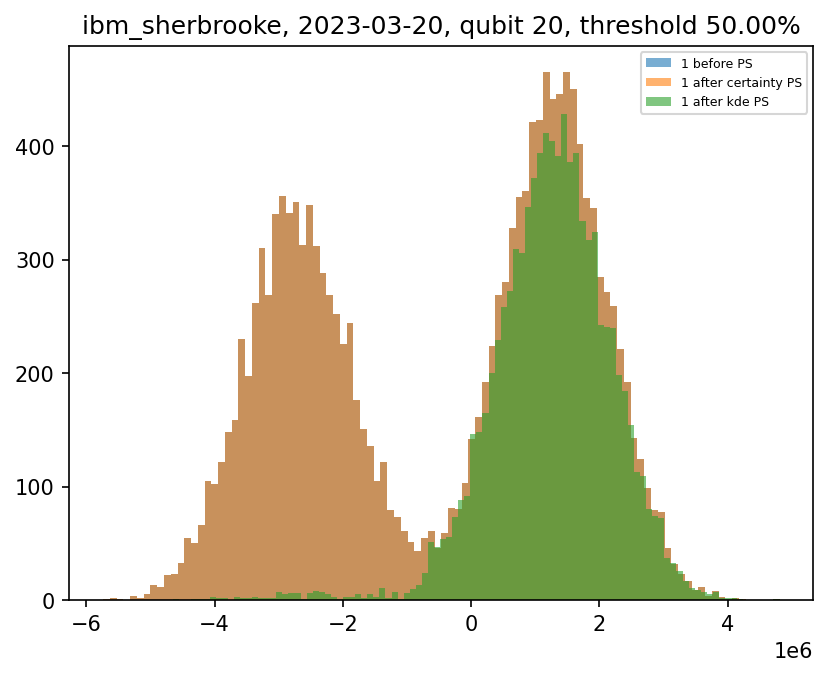

In [11]:
import matplotlib.pyplot as plt

mmr = 'mmr_0'
mmr2 = 'mmr_1'

plt.figure(dpi=150)

# plt.hist(all_memories[qubit][mmr].real.flatten(), bins=100, alpha=0.6, label='0 before PS')
# plt.hist(PS_mmr[qubit][mmr].real.flatten(), bins=100, alpha=0.6, label='0 after certainty PS')
# plt.hist(PS_d_mmr[qubit][mmr].real.flatten(), bins=100, alpha=0.6, label='0 after kde PS')

plt.hist(all_memories[qubit][mmr2].real.flatten(), bins=100, alpha=0.6, label='1 before PS')
plt.hist(PS_mmr[qubit][mmr2].real.flatten(), bins=100, alpha=0.6, label='1 after certainty PS')
plt.hist(PS_d_mmr[qubit][mmr2].real.flatten(), bins=100, alpha=0.6, label='1 after kde PS')


plt.title(f"{DEVICE}, {DATE}, qubit {qubit}, threshold {THRESHOLD*100:.2f}%")
plt.legend(fontsize=6)
plt.show()

In [12]:
from Scratch import get_msmt_err_probs

err_probs = get_msmt_err_probs(ratios)
print(err_probs)

# print the max error probability 
sorted_soft = sorted(err_probs.items(), key=lambda x: x[1]['p_soft'], reverse=True)
sorted_hard = sorted(err_probs.items(), key=lambda x: x[1]['p_hard'], reverse=True)
    
max_p_soft = sorted_soft[0]
max_p_hard = sorted_hard[0]

print()
print("sorted soft:", sorted_soft)
print("sorted hard:", sorted_hard)

{0: {'p_hard': 0.004667259334518669, 'p_soft': 6.3500127000254e-05}, 1: {'p_hard': 0.012192024384048768, 'p_soft': 0.004318008636017272}, 2: {'p_hard': 0.014319278638557276, 'p_soft': 0.011271272542545086}, 3: {'p_hard': 0.010922021844043688, 'p_soft': 0.001079502159004318}, 4: {'p_hard': 0.007112014224028448, 'p_soft': 0.0024765049530099063}, 5: {'p_hard': 0.010922021844043688, 'p_soft': 0.03321056642113284}, 6: {'p_hard': 0.019335788671577342, 'p_soft': 0.02136779273558547}, 7: {'p_hard': 0.006127762255524511, 'p_soft': 0.0015875031750063502}, 8: {'p_hard': 0.004921259842519685, 'p_soft': 0.031146812293624586}, 9: {'p_hard': 0.037020574041148085, 'p_soft': 0.017081534163068325}, 10: {'p_hard': 0.005365760731521463, 'p_soft': 0.003524257048514097}, 11: {'p_hard': 0.009144018288036576, 'p_soft': 0.001936753873507747}, 12: {'p_hard': 0.01501778003556007, 'p_soft': 0.008858267716535433}, 13: {'p_hard': 0.010223520447040894, 'p_soft': 0.027463804927609855}, 14: {'p_hard': 0.02451104902209

In [13]:
# print the mean error probability
mean_p_soft = sum([x[1]['p_soft'] for x in err_probs.items()])/len(err_probs)
mean_p_hard = sum([x[1]['p_hard'] for x in err_probs.items()])/len(err_probs)

print(f"mean p_soft: {mean_p_soft}")
print(f"mean p_hard: {mean_p_hard}")

mean p_soft: 0.008005516011032021
mean p_hard: 0.021726293452586896


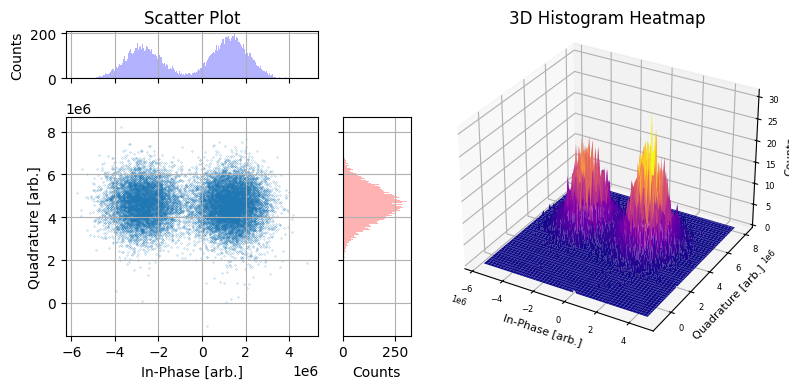

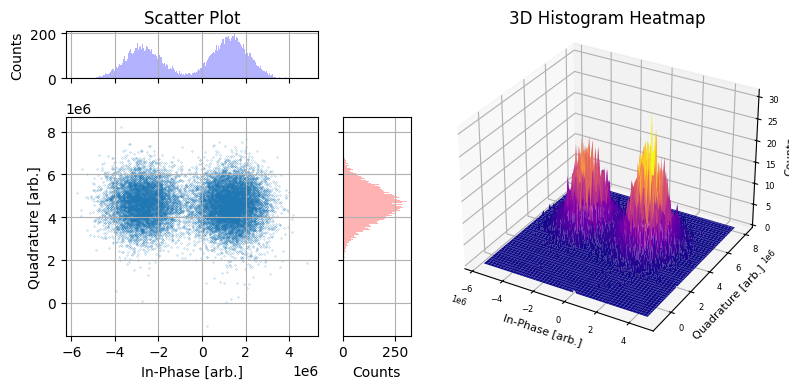

In [14]:
from soft_info import plot_IQ_data


plot_IQ_data(all_memories[qubit]['mmr_1'])
plot_IQ_data(PS_mmr[qubit]['mmr_1'])